In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.utils.data.dataloader import DataLoader
import tiktoken

from src.data_loader import load_data
from src.utils import load_config
from src import wikipedia_article_dataset
from src.models import CNN, CNNModel, MultilabelCNNModel
from src.evaluation import evaluate_model

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


## Binary Classification

In [2]:
MAX_LENGTH = 400
BATCH_SIZE = 16

EMBEDDING_DIM = 128
NUM_FILTERS = 10
FILTER_SIZES = [3, 4, 5]
DROPOUT = 0.5

In [3]:
config = load_config("just-load")
df = load_data(config["data_loader"], "binary")
df

,text,label
0,30 Boxes is a calendaring web application. The...,1
1,Tropical Depression Two E was a short lived tr...,0
2,The 2 43rd Battalion was an infantry battalion...,0
3,the7stars is the United Kingdom's media agency...,1
4,The 2 6th Battalion was an infantry battalion ...,0
...,...,...
195,2Shy is the sixth episode of the third season ...,0
196,The 2nd Battalion was an infantry battalion of...,0
197,3 Splash stylized as 3 SPLASH is an EP by Japa...,0
198,The 4 Hour Chef The Simple Path to Cooking Lik...,1


In [4]:
X_train, X_test, y_train, y_test = train_test_split(list(df["text"]), list(df["label"]), test_size=0.2)

In [5]:
model = CNNModel(
    EMBEDDING_DIM,
    NUM_FILTERS,
    FILTER_SIZES,
    MAX_LENGTH,
    DROPOUT
)

In [6]:
model.fit(X_train, y_train, 0.001, 3, BATCH_SIZE)

Epoch 1/3, Loss: 1.1755
Epoch 2/3, Loss: 0.8972
Epoch 3/3, Loss: 0.7858


In [7]:
predictions = model.predict(X_test)

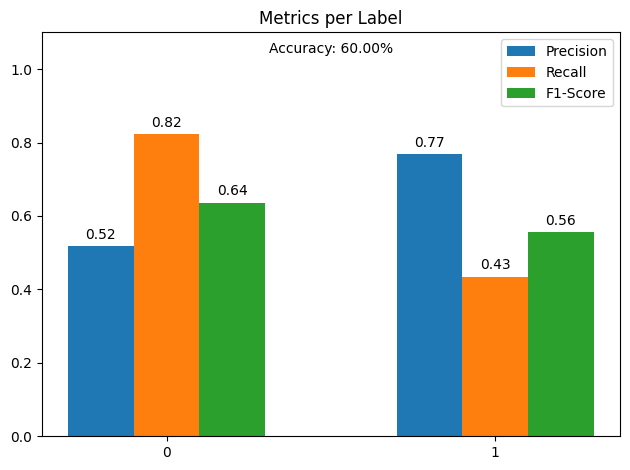

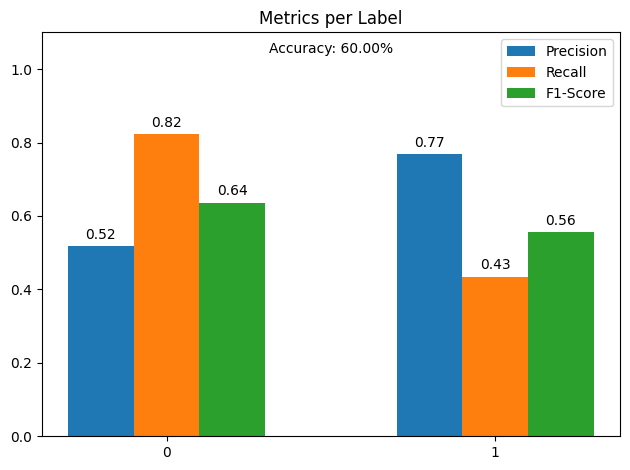

In [8]:
evaluate_model(model, X_test, y_test)

## Multilabel Classification

In [9]:
config = load_config("just-load")
df = load_data(config["data_loader"], "multilabel")
df

,Unnamed: 0,text,advert,coi,fanpov,pr,resume
0,6,2ergo is a provider of mobile phone marketing ...,1,0,0,0,0
1,62,The 401st Army Field Support Brigade is now lo...,1,0,0,0,0
2,56,123 reg is headquartered in England and is a d...,1,0,0,0,0
3,70,The 1990 All Ireland Senior Hurling Championsh...,0,0,1,0,0
4,59,A 360 degree feedback also known as multi rate...,1,0,0,0,0
...,...,...,...,...,...,...,...
95,27,The 7th Transportation Brigade Expeditionary i...,1,0,0,0,0
96,82,The 201213 Dallas Mavericks season was the 33r...,0,0,1,0,0
97,88,The 2016 Pro Kabaddi League season was the thi...,0,0,0,1,0
98,76,The 2009 Australian Open was a tennis tourname...,0,0,1,0,0


In [10]:
model = MultilabelCNNModel(
    EMBEDDING_DIM,
    NUM_FILTERS,
    FILTER_SIZES,
    MAX_LENGTH
)

texts = df["text"].tolist()

columns = ["advert", "coi", "fanpov", "pr", "resume"]
labels = df[columns].values.tolist()

In [11]:
model.fit(texts, labels, learning_rate=0.01, num_epochs=3, batch_size=16)

Epoch 1/3, Loss: 0.6611
Epoch 2/3, Loss: 0.7164
Epoch 3/3, Loss: 0.4594


In [12]:
predictions = model.predict(texts)

In [13]:
for i, col in enumerate(columns):
    pred_col = [p[i] for p in predictions]
    label_col = [l[i] for l in labels]

    print(f"Classification Report for {col}:")
    print(classification_report(label_col, pred_col))

Classification Report for advert:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        33
           1       0.85      1.00      0.92        67

    accuracy                           0.88       100
   macro avg       0.92      0.82      0.85       100
weighted avg       0.90      0.88      0.87       100

Classification Report for coi:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       0.00      0.00      0.00        10

    accuracy                           0.90       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.81      0.90      0.85       100

Classification Report for fanpov:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        84
           1       0.00      0.00      0.00        16

    accuracy                           0.84       100
   macro avg       0.42      

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  